# Régression logistique

## Packages

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score,r2_score, matthews_corrcoef, make_scorer


# Personnal lib
import lib.data as data

## Données

Pour le moment, les données sont importées directement d'un csv.

In [5]:
train = pd.read_csv('train_log.csv')
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,VAge1,VAge2,VAge3,VPolicy0,VPolicy1,VPolicy2,VPolicy3,Response
0,0,30,1,28,0,1,26891,270,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0,28,1,28,1,0,45434,146,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0,32,1,47,0,0,2630,195,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0,54,1,28,0,0,41420,121,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0,45,1,36,0,1,32764,185,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


## Preprocess

In [13]:
# Variables explicative
exp_var = train.columns[:-1]

# Décomposition features / target
X = train[exp_var]
Y = train['Response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index, columns=exp_var)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index, columns=exp_var)

## Mesures

In [18]:
def f1_scorer(clf,X,Y) :
    Y_clf = clf.predict(X)
    score = f1_score(Y,Y_clf)
    return score


def cv_f1_score(clf,X,Y) :
    Y_clf = clf.predict(X)
    score = cross_val_score(clf,X,Y,cv=5,scoring = make_scorer(f1_score))
    return score.mean()

In [28]:
def result_model(model,X,Y) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
    score = cross_val_score(clf,X,Y,cv=5,scoring = make_scorer(f1_score))
    print('F1 cross validé :', np.mean(score))
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True)
    plt.title(str(model))
    plt.show()
    
    return(Y_model)

## Modèle

C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Le f1 score vaut 0.3127962085308057
F1 cross validé : 0.3150134825465126


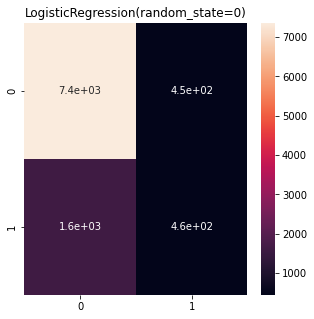

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [29]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
result_model(clf, X_test, Y_test)